In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

import os
os.chdir("/Users/gilgu/OneDrive/Escritorio")

In [2]:
# Cargar los datos
data = pd.read_csv('drugs.csv')

In [3]:
# Mostrar las primeras filas para entender la estructura de los datos
print(data.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY


In [4]:
# Convertir variables categóricas a numéricas utilizando LabelEncoder

le = preprocessing.LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['BP'] = le.fit_transform(data['BP'])
data['Cholesterol'] = le.fit_transform(data['Cholesterol'])

In [5]:
# Convertir la variable objetivo (DRUG) según el tipo de proveedor
data['Drug'] = data['Drug'].map({'A': 0, 'B': 1, 'C': 2, 'X': 3, 'Y': 4})

In [6]:
# Dividir los datos en características (X) y objetivo (y)
X = data[['Age', 'Sex', 'BP', 'Cholesterol']]
y = data['Drug']

In [7]:
# Utilizar diferentes métodos de optimización para Regresión Logística
solvers = ['sag', 'newton-cg', 'liblinear', 'saga', 'lbfgs']
best_solver = None
best_accuracy = 0

for solver in solvers:
    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
import numpy as np

# Encuentra índices de filas con valores NaN en y_train
nan_indices = np.isnan(y_train)

# Elimina filas correspondientes en X_train e y_train
X_train = X_train[~nan_indices]
y_train = y_train[~nan_indices]

In [9]:
print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)

Forma de X_train: (0, 4)
Forma de y_train: (0,)


Accuracy: 0.15
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.33      0.12      0.18         8
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         1
           4       0.22      0.33      0.27         6

    accuracy                           0.15        20
   macro avg       0.11      0.09      0.09        20
weighted avg       0.20      0.15      0.15        20



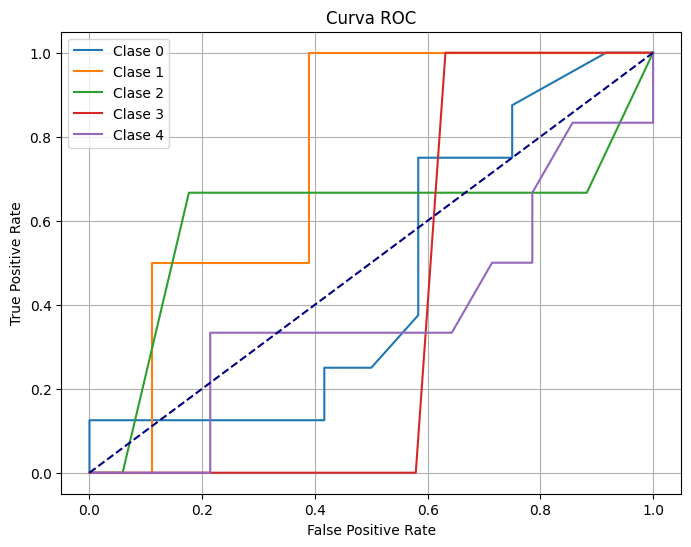

Área bajo la curva ROC: 0.5194148053958425


In [12]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Simulación de datos
X, y = np.random.rand(100, 10), np.random.randint(0, 5, 100)

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definición y entrenamiento del modelo
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

# Evaluar la eficacia del algoritmo predictivo
# Predicción de etiquetas de clase sobre datos de prueba
y_pred = best_model.predict(X_test)

# Evaluación de la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Predicción de probabilidades para casos particulares
y_prob = best_model.predict_proba(X_test)

# Graficación de la curva ROC y cálculo del área bajo ella
plt.figure(figsize=(8, 6))
for i in range(5):
    fpr, tpr, _ = roc_curve((y_test == i), y_prob[:, i])
    plt.plot(fpr, tpr, label=f'Clase {i}')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()

# Calcular el área bajo la curva ROC
roc_auc = roc_auc_score(pd.get_dummies(y_test), y_prob, multi_class='ovr')
print("Área bajo la curva ROC:", roc_auc)
